In [52]:
import random
import math

import numpy as np

from matplotlib import pyplot as plt

In [53]:
def uniform_circle(c: tuple, r: float, n: int):
    points = []

    for i in range(n):
        angle = random.uniform(0, 2 * math.pi)
        dist = random.uniform(0, r)

        x = c[0] + dist * math.cos(angle)
        y = c[1] + dist * math.sin(angle)

        points.append([x, y])

    return np.array(points)

### Generate samples and dataset

In [54]:
def one_hot_encoding(n: int, idx: int) -> np.ndarray:
    q = np.zeros(n)
    q[idx] = 1.0
    return q

In [55]:
n_samples_1 = 250
n_samples_2 = 250

sample1 = uniform_circle((-1, 1), 2, n_samples_1)
labels1 = np.array([one_hot_encoding(2, 0) for i in range(n_samples_1)])

sample2 = uniform_circle((1, -1), 2, n_samples_2)
labels2 = np.array([one_hot_encoding(2, 1) for i in range(n_samples_2)])

data = np.vstack((
    sample1,
    sample2
))

labels = np.vstack((
    labels1,
    labels2
))

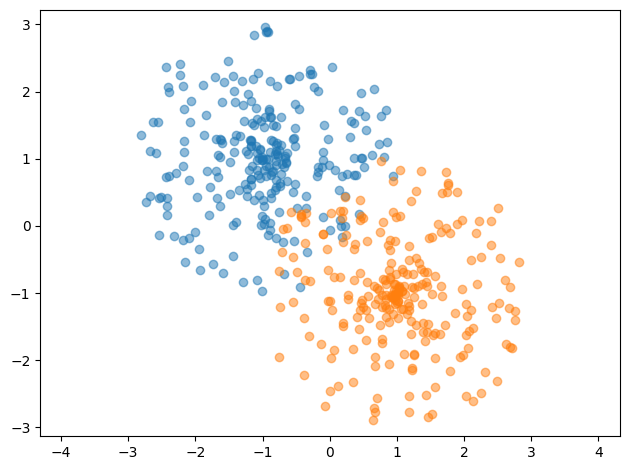

In [56]:
plt.scatter(sample1[:, 0], sample1[:, 1], alpha=0.5)
plt.scatter(sample2[:, 0], sample2[:, 1], alpha=0.5)

plt.axis('equal')
plt.tight_layout()
plt.show()

### Split dataset to test and train

In [57]:
test_frac = 0.7

p = np.random.permutation(len(data))

test_size = int(p.size * test_frac)
train_size = int(p.size * (1 - test_frac))

idx_test = p[0:test_size]
idx_train = p[test_size:p.size]

x_test = np.array(data[idx_test])
y_test = np.array(labels[idx_test])

x_train = np.array(data[idx_train])
y_train = np.array(labels[idx_train])

### Define model parameters and train it

In [58]:
def softmax(x: np.ndarray) -> np.ndarray:
    y = np.exp(x)
    return y / np.sum(y)


def grads(x_batch: np.ndarray, y_batch: np.ndarray, w: np.ndarray, b: np.ndarray) -> tuple[np.ndarray]:
    dw = np.zeros(w.shape)
    db = np.zeros(b.shape)

    for i in range(x_batch.shape[0]):
        y = softmax(w @ x_batch[i] + b)
        dLdy = y - y_batch[i]
        dw += np.outer(dLdy, x_batch[i])
        db += dLdy

    return (dw, db)


class Perceptron:
    def __init__(self, n_in: int, n_out: int) -> None:
        self.n_in = n_in
        self.n_out = n_out
        self.w: np.ndarray = np.random.uniform(-1, 1, (n_out, n_in))
        self.b: np.ndarray = np.zeros(n_out)

    def predict(self, x: np.ndarray) -> np.ndarray:
        return softmax(self.w @ x + self.b)

    def loss(self, x: np.ndarray, y: np.ndarray) -> float:
        ypred = np.array([self.predict(xi) for xi in x])
        h = -np.mean(y * np.log(ypred), axis=1)
        return np.mean(h)

    def train(self, x_train: np.ndarray, y_train: np.ndarray, lr, batch_size, max_epoch) -> None:
        n = x_train.shape[0]

        for epoch in range(max_epoch):
            idxs = np.random.permutation(n)
            n_batches = n // batch_size

            for i in range(n_batches):
                ibegin = i * batch_size
                iend = min((i + 1) * batch_size, n - 1)
                batch_idxs = idxs[ibegin:iend]

                dw, db = grads(x_train[batch_idxs], y_train[batch_idxs], self.w, self.b)

                self.w -= lr * dw
                self.b -= lr * db

### Create and train model

In [72]:
n_in = 2
n_out = 2

learning_rate = 1e-1
batch_size = 16
max_epoch = 32

model = Perceptron(n_in, n_out)

print('untrained loss: ', model.loss(x_test, y_test).round(4))
model.train(x_train, y_train, learning_rate, batch_size, max_epoch)
print('trained loss: ', model.loss(x_test, y_test).round(4))

untrained loss:  0.1983
trained loss:  0.0465


### Calculate accuracy metric

In [74]:
n_true_pos = 0

for x, y in zip(x_test, y_test):
    ypred = model.predict(x)
    n_true_pos += 1 if np.argmax(ypred) == np.argmax(y) else 0

accuracy = n_true_pos / x_test.shape[0]
print(f"test set accuracy: {round(accuracy * 100, 2)}%")

test set accuracy: 95.71%


### Print model parameters values

In [75]:
print(model.w)
print(model.b)

[[-1.97093302  1.7553174 ]
 [ 1.10151535 -1.90638512]]
[-0.37125961  0.37125961]


### Visualize model decision boundary

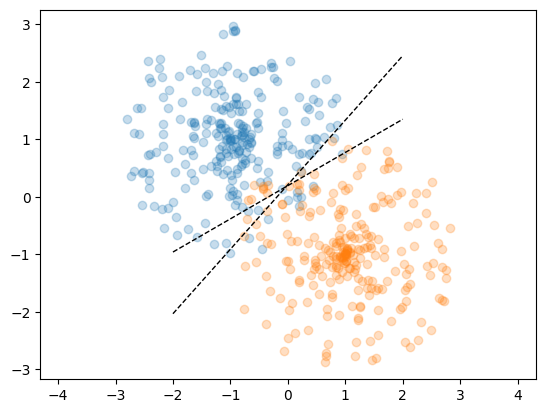

In [76]:
w1_1 = model.w[0][0]
w1_2 = model.w[0][1]
b_1 = model.b[0]

w2_1 = model.w[1][0]
w2_2 = model.w[1][1]
b_2 = model.b[1]

x = np.linspace(-2, 2, 100)
y1 = -w1_1 / w1_2 * x - b_1 / w1_2
y2 = -w2_1 / w2_2 * x - b_2 / w2_2

plt.scatter(sample1[:, 0], sample1[:, 1], alpha=0.25)
plt.scatter(sample2[:, 0], sample2[:, 1], alpha=0.25)

plt.plot(x, y1, c='black', lw=1, ls='--')
plt.plot(x, y2, c='black', lw=1, ls='--')

plt.axis('equal')
plt.show()